In [121]:
%matplotlib inline

#import notebook
#from notebook.nbextensions import enable_nbextension
#enable_nbextension('notebook', 'usability/codefolding/main')
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import markdown
#import scipy.stats as stats
import sys
sys.path.append('/Users/vs/Dropbox/Python')
import itertools
import glob
import re
import os
from astropy.stats import sigma_clip
import scipy


#import reddening_laws as red
bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
mp.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [7]:
comparison_data = pd.read_csv('/Users/vs/Dropbox/Publications/omegaCen/phot_comparison.raw', skiprows=3, header=None, names = ['ID', 'xc', 'yc', 'mag_new', 'err_new', 'mag_old', 'err_old', 'chi', 'sharp'], delim_whitespace=True)

In [8]:
comparison_data

,ID,xc,yc,mag_new,err_new,mag_old,err_old,chi,sharp
0,21510,1171.835,20.337,16.883,0.0283,16.207,0.0251,-0.0010,-0.0005
1,21447,1167.441,20.921,16.623,0.0283,16.234,0.0240,0.0085,-0.0015
2,6843,454.087,670.974,17.099,0.0261,16.974,0.0285,0.0010,-0.0005
3,24227,1305.197,21.658,15.512,0.0369,15.485,0.0374,-0.0015,-0.0025
4,21086,1145.339,21.825,15.442,0.0256,15.340,0.0292,0.0045,-0.0005
5,19346,1064.270,22.610,14.252,0.0216,14.228,0.0254,-0.0010,0.0005
6,16882,950.643,22.757,15.088,0.0235,14.517,0.0445,0.0075,0.0015
7,16865,945.563,22.904,15.951,0.0232,15.744,0.0301,0.0015,-0.0005
8,18701,1032.468,23.062,16.249,0.0251,16.261,0.0326,-0.0025,0.0025
9,18818,1037.851,23.272,15.574,0.0190,15.347,0.0256,0.0105,-0.0010


In [9]:
comparison_data['mag_diff'] = comparison_data['mag_new'] - comparison_data['mag_old']
comparison_data['err_diff'] = np.sqrt((comparison_data['err_new'])**2 + (comparison_data['err_old'])**2)

In [44]:
clipped['mag_new'<15]

//anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3114: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  dout = self.data[indx]
//anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3130: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  elif _mask is not nomask and _mask[indx]:


0.67599999999999838

In [78]:
## Calculate average offset between the two reductions

## Sigma clipping the sample to get a representative value - threshold is 3 sigma
## Also compare to average of every matched star to see if it makes much difference

## Only using mag_new<15 in this calculation


clipped = sigma_clip(comparison_data.mag_diff[comparison_data.mag_new<14], sigma=3)
av_diff_clipped = np.ma.mean(clipped)
sdev_diff_clipped = np.ma.std(clipped)

av_diff_14mag = np.ma.mean(comparison_data.mag_diff[comparison_data.mag_new<14])
sdev_diff_14mag = np.ma.std(comparison_data.mag_diff[comparison_data.mag_new<14])

av_diff_whole = np.ma.mean(comparison_data.mag_diff)
sdev_diff_whole = np.ma.std(comparison_data.mag_diff)

In [119]:
print av_diff_clipped, sdev_diff_clipped
print av_diff_14mag, sdev_diff_14mag
print av_diff_whole, sdev_diff_whole

0.0894097788126 0.117187887097
0.0911338912134 0.232406781091
0.150033679963 0.292191740115


Field 1 Channel 1 statistics
---
* Whole sample: mean offset =  {{"%.3f" % av_diff_whole}}, standard deviation = {{"%.3f" % sdev_diff_whole}}
* Cut at $m<14$: mean offset =  {{"%.3f" % av_diff_14mag}}, standard deviation = {{"%.3f" % sdev_diff_14mag}}
* Sigma clipping at 3$\sigma$: mean offset =  {{"%.3f" % av_diff_clipped}}, standard deviation = {{"%.3f" % sdev_diff_clipped}}


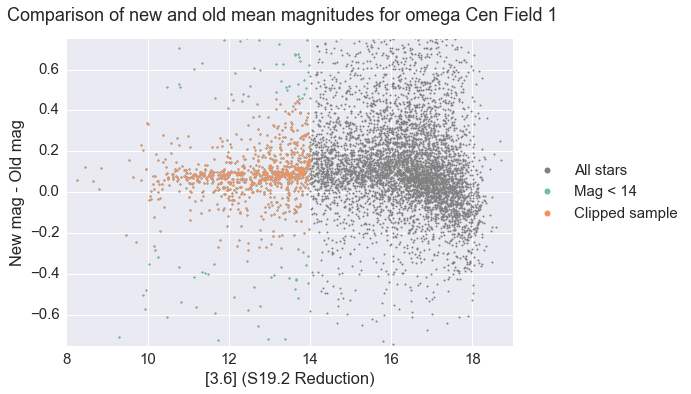

In [82]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 2)
palette = itertools.cycle(sns.color_palette())


mp.plot(comparison_data.mag_new, comparison_data.mag_diff, 'o', ls='None', ms=2, color='Grey', label='All stars')
mp.plot(comparison_data.mag_new[comparison_data.mag_new<14], comparison_data.mag_diff[comparison_data.mag_new<14], 'o', ls='None', ms=2, color=next(palette), label='Mag < 14')
mp.plot(comparison_data.mag_new[comparison_data.mag_new<14], clipped, 'o', ls='None', ms=2, color=next(palette), label='Clipped sample')

mp.xlim(8, 19)
mp.ylim(-0.75, 0.75)
mp.xlabel('[3.6] (S19.2 Reduction)')
mp.ylabel('New mag - Old mag')
mp.suptitle('Comparison of new and old mean magnitudes for omega Cen Field 1')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), markerscale=3)


In [139]:
## Is there a trend with mag?

bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(comparison_data.mag_new, comparison_data.mag_diff, bins=100)

bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

bin_means_c, bin_edges_c, binnumber_c = scipy.stats.binned_statistic(comparison_data.mag_new[comparison_data.mag_new<14], clipped, bins=20)

bin_width_c = (bin_edges_c[1] - bin_edges_c[0])
bin_centers_c = bin_edges_c[1:] - bin_width_c/2

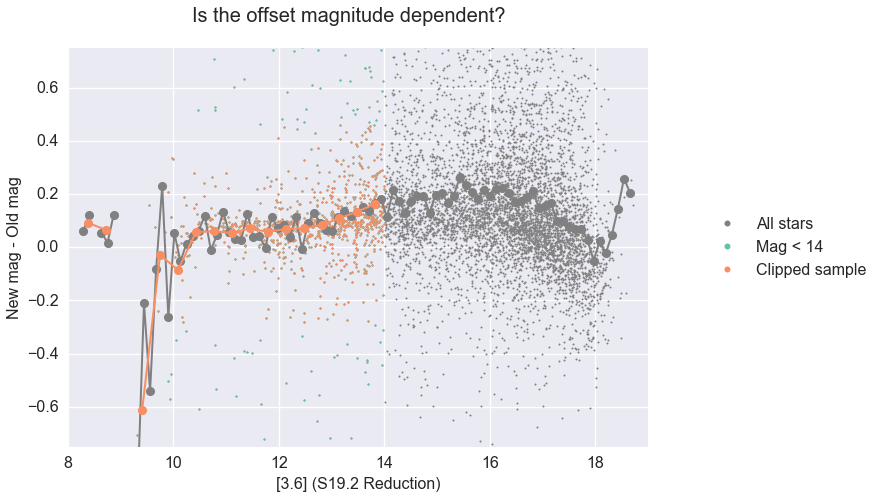

In [141]:
def fit_a_line(x, slope, zp):
    return slope*x + zp

#popt, pcov = curve_fit(fit_a_line, bin_centers,  bin_means)

#slope = popt[0]
#zp = popt[1]
#eslope = np.sqrt(float(pcov[0][0]))
#ezp = np.sqrt(float(pcov[1][1]))
#x1 = np.arange(7,16,1)

mp.plot(comparison_data.mag_new, comparison_data.mag_diff, 'o', ls='None', ms=2, color='Grey', label='All stars')
mp.plot(comparison_data.mag_new[comparison_data.mag_new<14], comparison_data.mag_diff[comparison_data.mag_new<14], 'o', ls='None', ms=2, color=next(palette), label='Mag < 14')
mp.plot(comparison_data.mag_new[comparison_data.mag_new<14], clipped, 'o', ls='None', ms=2, color=next(palette), label='Clipped sample')
mp.plot(bin_centers, bin_means, 'o', ls='-',color='Grey', lw=2)
next(palette)
mp.plot(bin_centers_c, bin_means_c, 'o', ls='-',color=next(palette), lw=2)

#mp.plot(x1, slope*x1 + zp, ls='-', color='Grey')
#mp.plot(x1, (slope+2*eslope)*x1 + (zp-2*ezp), ls='-.', color='Grey')
#mp.plot(x1, (slope-2*eslope)*x1 + (zp+2*ezp), ls='-.', color='Grey')



mp.xlim(8, 19)
mp.ylim(-0.75, 0.75)
mp.xlabel('[3.6] (S19.2 Reduction)')
mp.ylabel('New mag - Old mag')
mp.suptitle('Is the offset magnitude dependent?')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), markerscale=3)

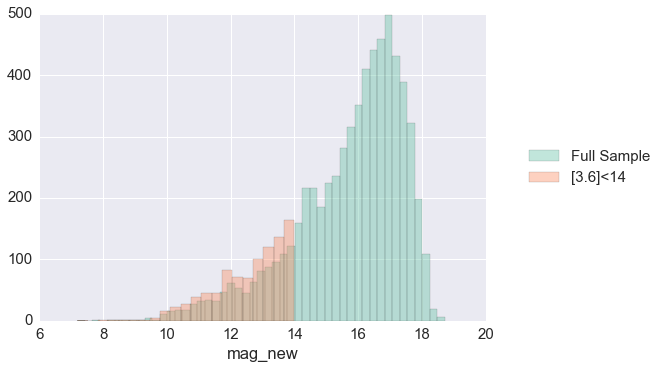

In [114]:
sns.distplot(comparison_data.mag_new, label='Full Sample', kde=False)
sns.distplot(comparison_data.mag_new[comparison_data.mag_new<14], label='[3.6]<14', kde=False)
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))


In [53]:
len(comparison_data.err_diff[comparison_data.mag_new<15])

1796

In [108]:
len(clipped)

956

In [59]:
len(comparison_data.mag_new[comparison_data.mag_new<15]), len(comparison_data.mag_diff[comparison_data.mag_new<15]), len(comparison_data.err_diff[comparison_data.mag_new<15])

(1796, 1796, 1796)

In [62]:
comparison_data.err_diff[comparison_data.mag_new<15]

5       0.033342
17      0.033791
18      0.028852
20      0.034846
27      0.025761
29      0.050982
34      0.032893
37      0.028859
39      0.034999
40      0.031127
41      0.034346
43      0.025967
47      0.026245
49      0.043571
56      0.033239
57      0.036503
58      0.047112
59      0.024560
62      0.023585
63      0.028966
66      0.049172
67      0.035850
68      0.037031
72      0.027398
77      0.029560
80      0.030751
83      0.021490
84      0.024280
86      0.032204
87      0.045661
          ...   
6328    0.019664
6329    0.041224
6337    0.046747
6340    0.032893
6342    0.022681
6345    0.020153
6348    0.046741
6349    0.046181
6350    0.071445
6355    0.062541
6357    0.022897
6364    0.054045
6366    0.030545
6372    0.019849
6376    0.033659
6378    0.052677
6381    0.054292
6384    0.065344
6385    0.066138
6387    0.050198
6388    0.031375
6404    0.023942
6405    0.033892
6414    0.062467
6427    0.029091
6431    0.048933
6433    0.043473
6435    0.0449